In [5]:
import os
import cv2
from skimage import transform
from skimage import exposure
from skimage import io
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [6]:
def load_split(basePath, csvPath):

    data = []
    labels = []
    rows = open(csvPath).read().strip().split("\n")[1:]
    random.shuffle(rows)
    for (i, row) in enumerate(rows):
        (label, imagePath) = row.strip().split(",")[-2:]
        imagePath = os.path.sep.join([basePath, imagePath])
        image = io.imread(imagePath)
        image = transform.resize(image, (32, 32))
        image = exposure.equalize_adapthist(image, clip_limit=0.1)
           
        data.append(image)
        labels.append(int(label))

    data = np.array(data)
    labels = np.array(labels)
    return (data, labels)


In [7]:
Names=['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',
'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing','No passing veh over 3.5 tons',
'Right-of-way at intersection','Priority road','Yield','Stop','No vehicles','Veh > 3.5 tons prohibited','No entry','General caution',
'Dangerous curve left','Dangerous curve right','Double curve','Bumpy road','Slippery road','Road narrows on the right','Road work', 
'Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing','End speed + passing limits', 
'Turn right ahead','Turn left ahead','Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory', 
'End of no passing','End no passing veh > 3.5 tons']

In [8]:
def sample_plot(X, y, index):

    plt.imshow(X[index])
    plt.xlabel(Names[y[index]])

In [9]:
trainPath = os.path.sep.join(["D:/Course/Deep Learning/archive", "Train.csv"])
testPath = os.path.sep.join(["D:/Course/Deep Learning/archive", "Test.csv"])
(trainX, trainY) = load_split("D:/Course/Deep Learning/archive", trainPath)
(testX, testY) = load_split("D:/Course/Deep Learning/archive", testPath)


trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

trainY=trainY.reshape(-1,)
testY=testY.reshape(-1,)



In [110]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)
(12630,)


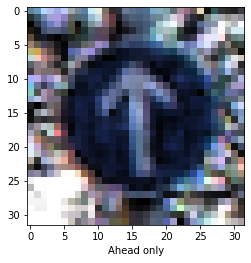

In [12]:
sample_plot(trainX*255,trainY,random.randint(0,len(trainY)))

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(43, activation='softmax')
])


In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(trainX, trainY, epochs=15)


Epoch 1/15
1226/1226 [==============================] - 14s 11ms/step - loss: 3.5018 - accuracy: 0.0553
Epoch 2/15
1226/1226 [==============================] - 14s 11ms/step - loss: 3.4658 - accuracy: 0.0709
Epoch 3/15
1226/1226 [==============================] - 15s 12ms/step - loss: 1.4309 - accuracy: 0.6019
Epoch 4/15
1226/1226 [==============================] - 15s 12ms/step - loss: 0.6082 - accuracy: 0.8233
Epoch 5/15
1226/1226 [==============================] - 15s 12ms/step - loss: 0.4286 - accuracy: 0.8771
Epoch 6/15
1226/1226 [==============================] - 15s 13ms/step - loss: 0.3384 - accuracy: 0.9045
Epoch 7/15
1226/1226 [==============================] - 15s 12ms/step - loss: 0.2786 - accuracy: 0.9229
Epoch 8/15
1226/1226 [==============================] - 15s 12ms/step - loss: 0.2329 - accuracy: 0.9349
Epoch 9/15
1226/1226 [==============================] - 15s 12ms/step - loss: 0.1978 - accuracy: 0.9440
Epoch 10/15
1226/1226 [==============================] - 15s 12m

In [16]:
cnn.evaluate(testX,testY)


395/395 [==============================] - 2s 5ms/step - loss: 0.4116 - accuracy: 0.9052


[0.41164037585258484, 0.9052256345748901]

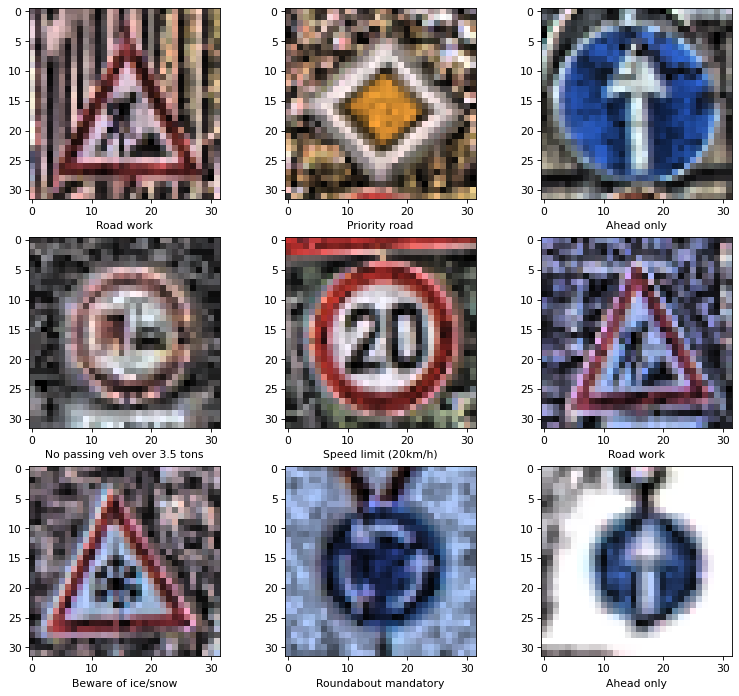

In [106]:
indices=random.sample(range(1, len(testY)), 9)
fig=plt.figure(figsize = (12,11))
test_X=testX*255
columns = 3
rows = 3
i=1
for index in indices:
    y_pred=cnn.predict(testX[index,:].reshape(1, 32, 32, 3))
    y=np.argmax(y_pred)
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_X[index, :])
    plt.xlabel(Names[y])
    i+=1
plt.show()

